# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# pivot() vs pivot_table()

**pivot()**: verileri bir DataFrame'den başka bir DataFrame'e dönüştürür ve verileri bir sütuna göre gruplar. Bu yöntem, verileri yeni bir yapıya dönüştürmek için kullanılırken, herhangi bir toplama veya gruplama işlevi gerçekleştirmez. Duplicated değerler olduğunda kullanılamaz.

**pivot_table()**: bir veya daha fazla sütuna göre gruplama işlemi gerçekleştirir ve sonuç olarak bir özet tablosu oluşturur. Bu yöntem, verilerin toplama, ortalama, medyan, minimum, maksimum, sayma gibi işlemlerle gruplanması ve özetlenmesi için kullanılır. Duplicated değerler olduğunda kullanışlıdır.

[SOURCE01](https://www.quora.com/In-pandas-whats-the-difference-between-dataframe-pivot-and-dataframe-pivot_table),
[SOURCE02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html),
[SOURCE03](https://www.w3resource.com/pandas/dataframe/dataframe-pivot.php),
[SOURCE04](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html),
[SOURCE05](https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/),
[SOURCE06](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

In [17]:
# verimizi farkli sekilde gormemizi saglar
# pivot() u dublicate olmadigi durumlarda kullaniyoruz.
# pivot_table()  dublicate olanlarin ortalamasini alip yerlestiriyor

In [18]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}
df = pd.DataFrame(data)
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [19]:
df.pivot_table(index = 'gender' , columns = 'sport' , values = ['age'], aggfunc = 'mean')
# burada gender sutununun valuelarini grupla yeni table in index sutunu yap, sport sutunun valuelarini yeni table in sutunlari yap, 
# yeni table in valuelari da 'age' sutunun value lari olsun.Value lari alirken dublicate olursa aggfunc='mean' den dolayi ortalamasini alir ve ort.yazdirir
# pivot_table ile table i benim istedigim gibi ozellestir diyorum
# aggfunc-->aggregate fonksiyon demek ve default olarak aggfunc = 'mean' dir

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [20]:
df.pivot_table(index= "gender", columns="sport", values= ["age", "weight", "height"], aggfunc="mean")

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [21]:
df.pivot(index= "gender", columns="sport", values= ["age", "weight", "height"])
# default olarak aggfunc = 'mean' dir

age                               weight                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0       62.0      NaN   58.0   
male         21.0     23.0   20.0       NaN       90.0     80.0   83.0   

                     height                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female      65.0      175.0      NaN  172.0     182.0  
male         NaN      196.0    178.0  185.0       NaN

In [22]:
df.pivot(index= "gender", columns="sport", values= "status")

sport,basketball,football,tennis,voleyball
gender,,,,
female,professional,NaN,professional,amateur
male,amateur,amateur,professional,NaN


In [23]:
df.pivot_table(index= "gender", columns="sport", values= "status")

sport
gender
female
male


In [24]:
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [25]:
df.loc[2 , "sport"] = "tennis"
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [26]:
df.pivot_table(index= "gender", columns="sport", values= ["age", "weight", "height"], aggfunc="mean")

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN   25.0      22.0        NaN      NaN  173.5   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0        NaN      NaN   60.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [27]:
df.pivot(index= "gender", columns="sport", values= ["age", "weight", "height"])

ValueError: Index contains duplicate entries, cannot reshape

# Type of NaN Values

**NaN** = Not-a-Number

**np.nan**, belirsiz veya tanımlanamaz sayısal değerleri temsil etmek için kullanılır.

np.nan değeri, "sentinel" bir değer olarak kabul edilir ve herhangi bir değerle, hatta kendisiyle bile karşılaştırılamaz.

**Sentinel**; matematiksel hesaplamalarda belirsiz veya tanımlanamaz değerleri temsil etmek için kullanılır.

**None**; sentinel bir değerdir ve bir fonksiyonun veya metodun "boş" veya "tanımsız" bir değeri ifade etmesi için kullanılır.

Sütunun data tipi object ise "nan", sayısal ise "NaN" olur.

[SOURCE01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), 
[SOURCE02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object),
[SOURCE03](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), 
[SOURCE04](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb),
[SOURCE05](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan),
[SOURCE06](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python),
[SOURCE07](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)

In [29]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])
df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })

In [30]:
df = df0.copy()
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [32]:
type(np.nan)

float

In [ ]:
type(np.NaN)

In [ ]:
type(None)

In [ ]:
pd.Series([1, np.nan, np.NaN, None, 2])

In [ ]:
print("1", 0 * np.nan)
print("2", np.nan - np.nan)
print("3", np.nan + np.nan)
print("4", np.nan - 10)
print("5", np.nan + 10)
print("6", np.nan == np.nan)
print("7", 10 > np.nan)
print("8", np.inf > np.nan)
print("9", float('-inf') < np.nan < float('inf'))
print("10", np.nan is np.nan)

# Detecting Missing Values

In [ ]:
df.isnull() # satir ve sutunlarda null deger varsa True yoksa False donduruyor

In [ ]:
df.isna() # yukaridaki ile ayni isi yapar

In [ ]:
df.notnull() # bu yukaridaki iki methodun tersini getirir

In [ ]:
df.isnull().any() #any()sutunlarin icinde bir tane bile nun deger varsa True yoksa False dondurur

In [ ]:
df.isnull().any(axis=1) #

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
df.isnull().sum() # sum() bize her bir sutunda kac tane null deger oldugunu yazar

In [ ]:
df.isnull().sum().sum() # df in icindeki toplam null deger sayisini getirdi

# Converting Improper Values to NaN Values

In [ ]:
df

In [33]:
df['var1']=df['var1'].replace(to_replace = '-',value = np.nan).astype('float')
df['var1']
# var1 sutunundaki - olan degerleri NaN a cevirdik. - tire isareti string bir karakterdir.
# sonucun sayisal olmasi icin astype('float') yaptik

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [34]:
df['status']=df['status'].replace(to_replace = '-',value = np.nan) #status str old. icin astype i degismedik
df['status']

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [35]:
df.isnull().sum().sum() #demekki 5 tane - yi nan degere cevirmisiz

14

In [36]:
df0.isnull().sum().sum()

9

In [37]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


# Missing Value Handling Methods

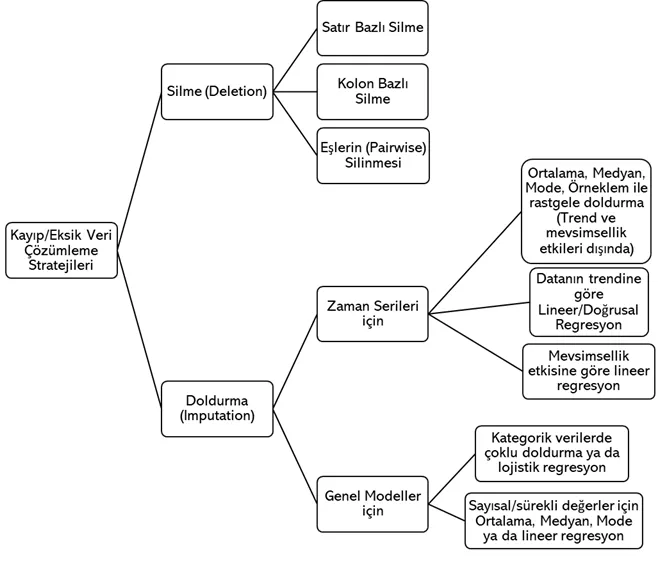

[SOURCE01](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e), 
[SOURCE02](https://www.shiksha.com/online-courses/articles/handling-missing-values-beginners-tutorial/),
[SOURCE03](https://medium.com/geekculture/how-to-deal-with-missing-values-in-machine-learning-98e47f025b9c), 
[SOURCE04](https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795)

## dropna() & drop()

In [38]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [39]:
df.dropna(axis = 0, inplace= False, how = "any") # how = "all" var bir de
# verisetindeki dolduramayacagimiz null degerleri dusurmek(silmek) icin kullanilir
# axis =0 old. icin satir satir inceledi satir icinde 1 tane bile null deger varsa o satirlari dusurur
# olmayanlari dondurur

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [40]:
df.dropna(axis = 1, inplace= False, how = "any")
# # axis =1 old. icin sutun sutun inceledi sutun icinde 1 tane bile null deger varsa o satirlari dusurur
# olmayanlari dondurur

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [41]:
df.dropna(axis=1, thresh = 9)
# sutunlarimizda null olmayan deger sayisi 9 dan az ise sil(dusur)
# veya sutunlarimizda null olmayan deger sayisi 9 ve 9 dan fazla ise dusurme

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [42]:
df.drop([1,3,5]) #axis=0 old. icin satir bazinda silme yapti

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [43]:
df.drop(["var1","var2"],axis =1) #axis=1 old. icin sutun bazinda silme yapti

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


## Filling Missing Values (Imputation)

### Filling Numeric Variables

In [44]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [45]:
df.fillna(0) # fillna() icerisine yazilan value ile null degerleri dolduruyor
# df imizdeki tum null degerleri 0 ile doldurdu

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [46]:
df[['var1']].fillna(0) # var1 sutunundaki null dgerleri 0 ile doldur

,var1
0,2.0
1,3.0
2,5.0
3,0.0
4,7.0
5,1.0
6,0.0
7,10.0
8,14.0
9,0.0


In [47]:
df[["var1"]].fillna(df["var1"].mean())

,var1
0,2.0
1,3.0
2,5.0
3,6.0
4,7.0
5,1.0
6,6.0
7,10.0
8,14.0
9,6.0


In [48]:
df[["var1"]].fillna(df["var1"].median())

,var1
0,2.0
1,3.0
2,5.0
3,5.5
4,7.0
5,1.0
6,5.5
7,10.0
8,14.0
9,5.5


In [155]:
df.mean()

var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [156]:
df.fillna(df.mean()) # df deki null verilerimizi df in ortalamsi ile doldur

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [157]:
df.fillna({"dept": "Other", "var1": df.var1.mean(), "var2": df.var2.median()})
# dept sutunundaki null degerleri Other ile, var1 sutunundaki null degerleri df.var1 in ortalamasi ile, 
# var2 sutunundaki null degerleri df.var2 nin medyani ile doldur

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,Other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,Other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


### Filling Categorical Variables

In [50]:
df.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [49]:
df.dept.mode()

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [158]:
df.dept.mode()[0]
# mode() # en cok tekrarlayan(mod) degeri getirir

'AWS'

In [51]:
df.dept.fillna(df.dept.mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [52]:
df.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [53]:
df.dept.fillna(method = "bfill")
# method = "bfill" index sirasina bak index sirasinda null degerden sonra gelen deger ile doldur(b-->back)

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [54]:
df.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [55]:
df.dept.fillna(method = "ffill")
# method = "ffill" index sirasina bak index sirasinda null degerden once gelen deger ile doldur(f--> forward)

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [56]:
df.dept.fillna(method = "ffill", inplace=True)
df.dept

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [163]:
# ilk bastaki deger null ise ffill yapilmissa ilk deger doldurulamayacagi icin ffill den sonra bfill yapmak gerekir
# sondaki deger null ise bfill yapilmissa son deger doldurulamayacagi icin bfillden sonra  ffill yapmak gerekir

### Filling by condition & group

In [164]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [165]:
df.loc[df["salary"] >= 100, "status"]
#burada virgulden oncesi satir oldugu icin salary sutununda degeri 100 den buyuk olan satirlari ve status ile kesisen hucreleri getir

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [166]:
df.loc[df["salary"] < 100 , "status"]
#burada virgulden oncesi satir oldugu icin salary sutununda degeri 100 denkucuk olan satirlari ve status ile kesisen hucreleri getir

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [167]:
df.loc[df["salary"] >= 100 , "status"].mode()[0]
# mode() sonuna [0] koymazsak series formatinda getiriyor biz degeri almak istiyoruz o yuzden indexleme yapiyoruz
# salary si 100 ve 100 den buyuk satirlardan status satirinin en cok tekrar eden degerini getir

'FT'

In [168]:
df.loc[df["salary"] >= 100 , "status"].fillna(df.loc[df["salary"] >= 100, "status"].mode()[0], inplace = True)
# burada loc ile bir sart koyduk ve fillna ile bir sart daha koyduk bu sekilde birden cok sart kostugumuzda 
# inplace = True calismiyor ve kalici degisiklik yapmiyor bu sebeple kalici degisiklik yapabilmek icin asagidaki gibi atama yaptik

In [169]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [170]:
df.loc[df["salary"] >= 100, "status"] = df.loc[df["salary"] >= 100, "status"].fillna(df.loc[df["salary"] >= 100, "status"].mode()[0])
df.loc[df["salary"] < 100, "status"] = df.loc[df["salary"] < 100, "status"].fillna(df.loc[df["salary"] < 100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [171]:
df.status.mode()
# en cok tekrar eden deger 2 tane oldugu icin ikisini de getirdi

0    FT
1    PT
Name: status, dtype: object

In [172]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [173]:
df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0])


0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [91]:
df.groupby(["gender","dept"])[["status"]]

In [83]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [84]:
# status sutunundaki NAN degeri en cok tekrar eden deger ile doldurduk.
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0]), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [85]:
# salary sutunundaki Nan lari doldurmak icin , status ve dept sutununa gore gruplandirdi ve salary sutununu cagirdi ortalamsini aldi 
# ve salary sutununun Nan larini ortalama ile doldurdu
df["salary"].fillna(df.groupby(["status", "dept"])["salary"].transform("mean"), inplace=True)

In [86]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [87]:
df["var1"].fillna(df.groupby(["gender", "status"])["var1"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,2.0,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


In [89]:
df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"), inplace=True)

df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.00,125.0
1,P002,F,PT,FS,3.0,7.00,54.0
2,P003,M,PT,AWS,5.0,5.00,59.0
3,P004,F,FT,AWS,10.0,8.00,120.0
4,P005,M,PT,DS,7.0,11.00,58.0
5,P006,F,PT,DS,1.0,7.00,75.0
6,P007,M,FT,FS,2.0,6.25,136.0
7,P008,F,FT,FS,10.0,2.00,136.0
8,P009,M,PT,FS,14.0,3.00,60.0
9,P010,F,FT,DS,10.0,7.00,125.0


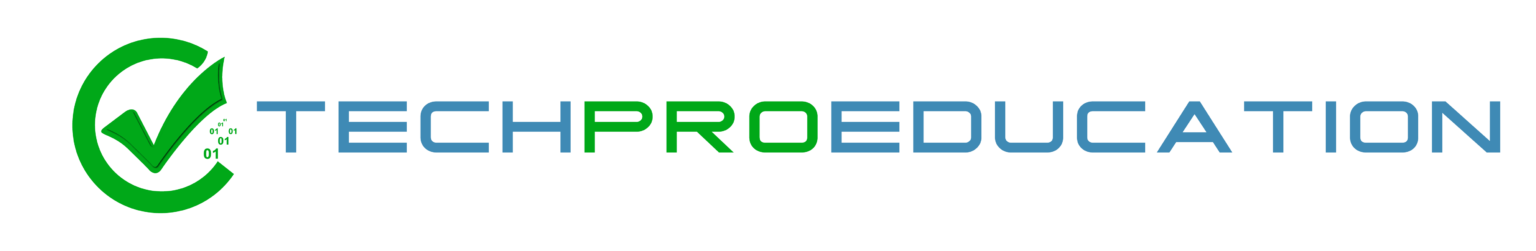